# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [178]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [236]:
df_temp = df[['temperature']]
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


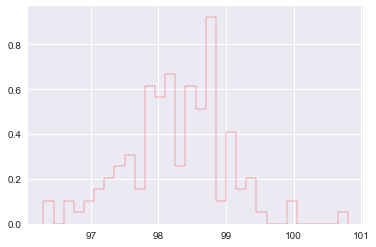

In [181]:
_ = plt.hist(df['temperature'],normed='True', bins=30, histtype='step', color='red')

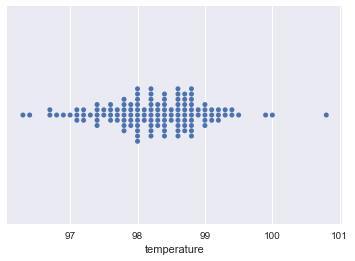

In [182]:
_ = sns.swarmplot(x='temperature', data=df_temp)

In [183]:
#df[(df['temperature']>=99.5) | (df['temperature']<=97 )]
#_ = sns.boxplot(df['temperature'])

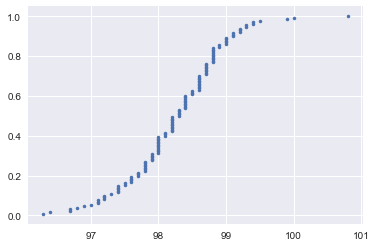

#### 1. Is distribution of body temperature normal
##### Method 1
Checking if the distribution is normal by calculating the z scores and finding out whether they are outside the 3rd Std Deviation. 

As you can see, only 1 value is outside 3 standard deviations

In [235]:
df_temp2 = df[['temperature']]
df_temp2.insert(1,'zascore',0)
df_temp2['zscore'] = pd.DataFrame((df_temp2['temperature'] - df_temp2['temperature'].mean()) / df_temp2['temperature'].std())['temperature']
df_temp2[~(df_temp2['zscore'].between(-3,3,inclusive=True))]


,temperature,zascore,zscore
116,100.8,0,3.479034


##### Method 2
Calculate ECDF

This show a distribution close to normal distribution

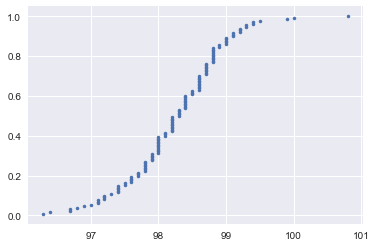

In [255]:
def ecdf(val1):
    x = np.sort(val1)
    y = np.arange(1, len(x) + 1) / len(x)
    return(x,y)

x,y = ecdf(df_temp['temperature'])
_ = plt.plot(x,y,marker = '.',linestyle='none')



#### 2. Is the sample size large? Are the observations independent?
Yes the sample size is 130 records and above the general rule of 30 ones which central limit theorem states.

Is hasn't been specified whether the observations are independent or not. 


#### 3. Is the true population mean really 98.6 degrees F?
###### a. Bootstrap hypothesis test: 
Assume that 98.6 is the actual mean temp. Shift the sample data by this mean and test the probabiliy of getting the sample mean from the shifted data.
 

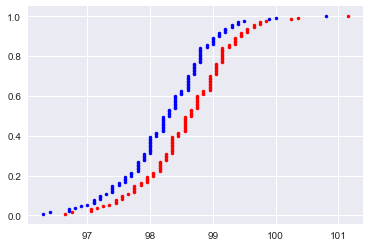

0.50358
Test Mean:  98.24923076923078
0.0


In [385]:
# Write function for bootstrap replicates
def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data,size=len(data))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

#Shift the data by Carl W's mean temp of 98.6
cw_mean = 98.6
tst_mean = df['temperature'].mean()
empirical_diff = tst_mean - cw_mean
temp_shifted = df['temperature'] - df['temperature'].mean() + cw_mean

# show ecdf for comparision. 
x_shif, y_shif = ecdf(temp_shifted)
_ = plt.plot(x_shif,y_shif,marker = '.',linestyle='none', color='red')
_ = plt.plot(x,y,marker = '.',linestyle='none', color='blue')
plt.show()


bs_temp_shifted = draw_bs_reps(temp_shifted,np.mean,100000)
bs_temp_shifted_rev = bs_temp_shifted - (cw_mean - tst_mean)

p = sum(bs_temp_shifted_rev <= tst_mean)/ len(bs_temp_shifted_rev)
print(p)
      
print('Test Mean: ',tst_mean)    

bs_temp_shifted_diff = bs_temp_shifted - cw_mean
#print(bs_temp_shifted)
#print('Empirical diff : ', empirical_diff)
#print(bs_temp_shifted_diff)
p = sum(bs_temp_shifted_diff <= empirical_diff)/ len(bs_temp_shifted_diff)
print(p)
#np.percentile(bs,[2.5,97.5])

In [388]:
p = sum(bs_temp_shifted <= tst_mean)/len(bs_temp_shifted)
p

0.0

###### b. Frequentist approach: one sample
One sample test makes more sense as we want to check the probability of the difference of the sample and observed mean. 
Using t-statistic is most appropriate in this case as it is used to calculate/compare the means and their differences.


In [407]:
from scipy import stats 
# calculate the std deviation of sample/test statistic
std_tst = df['temperature'].std()
# formulat for t-statistic: t = (ȳ - µ0)/(s/√n)
t_val = (tst_mean - cw_mean)/ (std_tst/np.sqrt(130))
p_val = stats.t.cdf(t_val, 129)
p_val


1.2053160207804971e-07

##### c. Frequentist approach: two sample
We use z-values for two sample approach. Although we do not have actual 2 samples, we would get one by looking up the standard deviation of observed mean body temperatures. 

The result is slightly different due to assumption of standard deviation of body temperature is 0.6F (got from internet). However, if the standard deviation increases, it becomes greatly different to t-statistics. 

In [491]:
# Assuming that critical value is 5%, we reverse look up the z score of 5% as the difference of means is assumed to be 0 and
# level of significance is 5 and empirical difference is negative. Assume 1 tailed distribution.
z_tst_minus_obs = stats.norm.ppf(0.05)

# forumalate standard deviation of difference of the two. Assuming that standard deviation of body temperature is 0.6F (internet)
sd_tst_minus_obs = np.sqrt((np.square(std_tst)/130) + (np.square(0.6)/130) )
p_val2 = (sd_tst_minus_obs * z_tst_minus_obs)

print('Probability of difference less than 5% of mean is: ', p_val2)
print('Empirical difference is: ', empirical_diff)
print('As empirical difference is less than 5% probability, we can reject null hypothesis that means are same.')


Probability of difference less than 5% of mean is:  -0.13667426002
Empirical difference is:  -0.35076923076921673
As empirical difference is less than 5% probability, we can reject null hypothesis that means are same.


#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Result is that t-statistic rejects null hypothesis consistently.
But z-statistic calculation by 2 sample does not reject it. 
It can be concluded that t-statistic is a better way of going about it.

In [493]:
# Draw a sample of 10 with replacement
# Without replacement is like this: s_10 = np.random.choice(df['temperature'],10,replace=False)
s_10 = np.random.choice(df['temperature'],10)


# Calculate the std of the sample of 10
std_tst_10 = s_10.std()

# formula for t-statistic: t = (ȳ - µ0)/(s/√n)
t_val_10 = (s_10.mean() - cw_mean)/ (s_10.std()/np.sqrt(10))
p_val_s10 = stats.t.cdf(t_val, 10)
print('Probability of difference of means via t-statistics is : ', p_val_s10)

# formulate via z-statistics
sd_s10_tst_minus_obs = np.sqrt((np.square(s_10.std())/10) + (np.square(0.6)/10) )
p_val2_s10 = (sd_s10_tst_minus_obs * z_tst_minus_obs)
print('Probability of difference less than 5% of mean is: ', p_val2_s10)
print('Empirical difference is: ', empirical_diff)
print('As empirical difference is greater than 5% probability, we cannot reject null hypothesis that means are same.')





Probability of difference of means via t-statistics is :  0.00013947685564
Probability of difference less than 5% of mean is:  -0.540779245121
Empirical difference is:  -0.35076923076921673
As empirical difference is greater than 5% probability, we cannot reject null hypothesis that means are same.


#### 5. At what temperature should we consider someone's temperature to be "abnormal"?
We define abnormal to be not fitting in 95% range. Meaning below 2.5 or 97.5 in two tailed normal distribution.


In [513]:
# 1. Using bootstraps
bs_reps = draw_bs_reps(df['temperature'],np.mean,10000)
print('Confidence interval using bootstrap: ',np.percentile(bs_reps,[2.5,97.5]))

#2. Using frequentist
sem = std_tst/np.sqrt(130)
print('Standard error:',sem)

# calculate 2.5 and 97.5 z scores. 
z_2_5 = stats.norm.ppf(0.025)
z_97_5 = stats.norm.ppf(0.975)
print('Confidence interval using frequentist : ', (z_2_5*sem) + tst_mean , z_97_5*sem + tst_mean)


Confidence interval using bootstrap:  [ 98.12384615  98.37461538]
Standard error: 0.0643044168379
Confidence interval using frequentist :  98.1231964282 98.3752651103


In [548]:
df_m = df[df['gender'] == 'M']['temperature']
df_f = df[df['gender'] == 'F']['temperature']
print('This is outside the 95% confidence interval', df_f.mean(), df_m.mean())


#def make_perms(data1,data2,size=1):
#    data = np.concatenate((data1,data2))
#    for i in range(size):
#        data = np.random.permutation(data)
#        p_data1 = data[:len(data1)]
#        p_data2 = data[len(data1):]
#        res[i] = func(p_data1)#,func(p_data2))
#    return res

#c = make_perms(df_m,df_f,np.mean,100)
#c = np.concatenate((np.array([1,2]),np.array([3,4])))


def perm_samples(data1,data2):
    data = np.concatenate((data1,data2))
    data = np.random.permutation(data)
    return(data[:len(data1)], data[len(data1):])

def mean_diff(data1,data2):
    #data1_p , data2_p = perm_samples(data1,data2)
    return(data1.mean() - data2.mean())

def perm_reps(data1,data2,func,size=1):
    res = np.empty(size)
    for i in range(size):
        data1_p , data2_p = perm_samples(data1,data2)
        res[i] = func(data1_p,data2_p)
    return(res)

perm_diff = perm_reps(df_m, df_f, mean_diff,10000)

obs_diff = df_m.mean() - df_f.mean()

p = sum(perm_diff <= obs_diff)/len(perm_diff)

p

This is outsize the 95% confidence interval 98.39384615384613 98.1046153846154


0.013599999999999999